Let's make a trivial inverse ODE problem example. Lets say we want to fit $y(t,a,b)$ to a function $d$ where $y(t,a,b)$ is the solution of
$$
y'=ay, y(0)=b
$$ 
using the following integral representation:
$$
y(t,a,b)= b + \int_{0}^{t} a y(s,a,b)ds .
$$ 
We can formulate this as an optimization problem
$$
\alpha, \beta = \text{argmin}_{a,b}||y(t,a,b)-d(t)||_{2}^{2}.
$$ 
or 
$$
\alpha, \beta = \text{argmin}_{a,b}||y(t,a,b)-d(t)||_{1}.
$$ 
where the problem in $L2$ norm can be solved using stochastic gradient descent and the problem in $L1$ norm with stochastic coordinate  trust region method based on SALT (we are not so sure about the $L1$).

The gradient of the $L2$ score is:

$$
\nabla f(a,b)= 
\left(\begin{array}{l}
\int_{0}^{1} (y(s)-d(s)) \partial_{a} y(s) ds\\ 
\int_{0}^{1} (y(s))-d(s)) \partial_{b} y(s) ds
\end{array}\right)
$$ 
We already have an integral equation for $y(s)$ the one for $\partial_{a}y(s)$ and $\partial_{b} y(s)$ can be obtained by taking the derivative of it:

$$
\begin{align*}
\partial_{a} y(s) &= \int_{0}^{t} y(s) + a \partial_{a} y(s) ds \\     
\partial_{b} y(s) &= 1+ \int_{0}^{t} a \partial_{b} y(s) ds \\     
\end{align*}
.
$$ 
this first integral equation we already dealt with (see coupled recursion) and the second one is pretty easy.


[0.8799142  1.93939682]


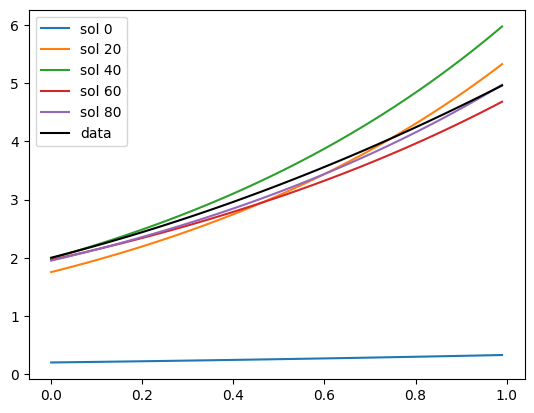

In [213]:
from random import random
import numpy as np
from math import exp
import matplotlib.pyplot as plt

def d(x):
    return (1+x+x**2/2)*2

def E(t,a,b)->np.array: # the second term is an estimator for parial_a y 
    if t<1 and random()>t:
        return np.array([1,0])
    e = E(random()*t,a,b)
    y = b + t*a*e[0] if t>1 else b + a*e[0]
    day= t*(e[0]+a*e[1]) if t>1 else e[0]+a*e[1]
    return np.array([y,day])
    
def dby(t,a,b):
    if t>1:
        return  1 + a* t*dby(random()*t,a,b) 
    return 1 + a* dby(random()*t,a,b) if random()<t else 1

def y(t,a,b):
    if t>1:
        return b + a*t*y(t,a,b)
    return b + a* y(random()*t,a,b) if random()<t else b

def grad_f(a,b):
    u = random()
    r = y(u,a,b)- d(u)
    daf = r*E(u,a,b)[1] 
    dbf = r*dby(u,a,b) 
    return np.array([daf,dbf])
    

xs = np.arange(0,1,0.01)
var = np.array([0.5,0.2])
for j in range(100):
    a,b = var
    s = 0
    nsim = 2*10
    for _ in range(nsim):
        s += grad_f(a,b)/nsim
    var -=s/20
    if j%20==0:
        ys = [b*exp(a*x) for x in xs]
        plt.plot(xs,ys, label =f"sol {j}")
print(var)

zs = [d(x) for x in xs]
plt.plot(xs,zs, color = "black", label= "data")
plt.legend()
plt.show()


Stochastic gradient descent sometimes get stuck in local minima. We're thinking about a way to fix this by using an orthonormal basis and salt so fitting first happens on a lower resolution, maybe that has an regularization effect?